## 3. Model Training

#### A360 MDK interface

In [1]:
a360ai

<A360 AI Interface for project: Customer Churn>

In [2]:
# Get default data repo
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'Customer Churn'

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [4]:
import warnings
warnings.filterwarnings('ignore')

### 1. Set Default Data Repo and load data

In [5]:
a360ai.set_default_datarepo(DATAREPO)

In [6]:
a360ai.list_datasets()

,base_name,extension,size
1,Reward-Customer-Churn.csv,csv,736215.0
2,X.parquet,parquet,174436.0
3,X_drift.parquet,parquet,25692.0
4,y.parquet,parquet,42876.0


In [7]:
X = a360ai.load_dataset("X.parquet")
y = a360ai.load_dataset("y.parquet")

### 2. Model training

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [9]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Use a360ai MDK to track model experiments

In [10]:
model = a360ai.get_or_create_model(model_name=f"churn_pred_2")

In [11]:
experiment = model.get_or_create_experiment(
    experiment_name = f"churn_pred_RF",
    model_flavor = "sklearn",
    enable_drift_monitoring=True,
    train_features=X_train,
    train_target=y_train,
    feature_names=list(X.columns),
    data_exploration_file="/home/jovyan/01_exploratory-data-analysis.ipynb",
    data_preparation_file="/home/jovyan/02_data-preprocessing.ipynb",
    model_training_file="/home/jovyan/03_model-training.ipynb",
)


//-- Experiment Loaded --//
Model Name: churn_pred_2
Experiment Name: churn_pred_RF
Final Run Id: None
Model Flavor: sklearn
Input Signature: ndarray: float64 (26,)
Output Signature: Churn big_integer
Data Exploration File: /home/jovyan/01_exploratory-data-analysis.ipynb
Data Preparation File: /home/jovyan/02_data-preprocessing.ipynb
Model Training File: /home/jovyan/03_model-training.ipynb
Drift Monitoring Enabled: True



In [12]:
experiments = model.list_experiments()
experiments

,id,bestRun,model_id,experiment_name,best_run_id,model_flavor,input_signature,output_signature,data_exploration_file,data_preparation_file,model_training_file,baseline,train_shape,model_name,updated_at
0,c36557f2-e0d8-464a-9b44-a9fa63bd74ef,"{'id': 'ff9f7ee1-766b-411d-ae07-f5d281124ca2',...",6605fc6f-81c9-4f0c-a32f-58bea3b6ae3b,churn_pred_RF_2,ff9f7ee1-766b-411d-ae07-f5d281124ca2,sklearn,"ndarray: float64 (26,)",Churn big_integer,/home/jovyan/01_exploratory-data-analysis.ipynb,/home/jovyan/02_data-preprocessing.ipynb,/home/jovyan/03_model-training.ipynb,"{'gender': {'mean': -7.200166389035681e-17, 's...",[26],churn_pred_2,2022-06-24 03:36
1,c4efb3df-eb82-4f5d-b4d8-6e698a90019c,None,6605fc6f-81c9-4f0c-a32f-58bea3b6ae3b,churn_pred_RF,None,sklearn,"ndarray: float64 (26,)",Churn big_integer,/home/jovyan/01_exploratory-data-analysis.ipynb,/home/jovyan/02_data-preprocessing.ipynb,/home/jovyan/03_model-training.ipynb,"{'gender': {'mean': -7.200166389035681e-17, 's...",[26],churn_pred_2,2022-06-24 03:36


In [13]:
count = 1
for n in [25,50,75,100,125,150]:
    with experiment.run_experiment() as run:
    
        hyperparams = {
            "n_estimators": n,
            "max_depth": 6            
        }
    
        rf = RandomForestClassifier(**hyperparams)
        rf.fit(X_train, y_train)
        train_score = rf.score(X_train, y_train)
        test_score = rf.score(X_test, y_test)

        metrics = {
            "train_score": train_score,
            "test_score": test_score,
        }

        run.log_metrics(metrics)
        run.log_hyperparameters(hyperparams)
        run.log_model(rf)
        
        print("Run " + str(count) + " Complete!")
        count = count + 1 

Run 1 Complete!
Run 2 Complete!
Run 3 Complete!
Run 4 Complete!
Run 5 Complete!
Run 6 Complete!


In [14]:
runs = experiment.list_runs()
runs

,id,dataset,artifact_paths,metric_test_score,metric_train_score,hyperparameter_max_depth,hyperparameter_n_estimators,metadata_run_time
0,1679fe6a-fe15-4571-8687-3d31ceace74c,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': 'd195ef2b-4d69-4b08-b1fd-db30ebae8a72'...,0.774698,0.813156,6,25,0.114030
1,cd14d743-7c57-4f06-84da-fe86550883f3,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': '087df362-5bdd-470e-977e-3d029b5f4d3b'...,0.777541,0.813867,6,50,0.216749
2,a5219580-009a-4cb1-aa3c-c179e35c08fe,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': '1c749b02-f107-412d-bbaa-9a1162144774'...,0.777541,0.815111,6,75,0.307241
3,6db74193-aa2c-48ee-8ab4-7b675ecb1423,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': '266e95d9-a670-45d6-8e78-f0f6fc6768eb'...,0.778962,0.816000,6,100,0.425554
4,280cb129-be4d-4883-8b8f-4f044a70e70f,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': '046594f3-bfdf-4fc1-95dc-ba09e3ef1a7d'...,0.776830,0.813689,6,125,0.521274
5,3046039e-0032-4e73-ba50-b43ab344481f,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': 'fdf96c7c-80fb-4fb9-bed0-c5b0c20025fb'...,0.776830,0.815111,6,150,0.632443


In [15]:
runs.sort_values('metric_test_score',ascending=False)

,id,dataset,artifact_paths,metric_test_score,metric_train_score,hyperparameter_max_depth,hyperparameter_n_estimators,metadata_run_time
3,6db74193-aa2c-48ee-8ab4-7b675ecb1423,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': '266e95d9-a670-45d6-8e78-f0f6fc6768eb'...,0.778962,0.816000,6,100,0.425554
1,cd14d743-7c57-4f06-84da-fe86550883f3,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': '087df362-5bdd-470e-977e-3d029b5f4d3b'...,0.777541,0.813867,6,50,0.216749
2,a5219580-009a-4cb1-aa3c-c179e35c08fe,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': '1c749b02-f107-412d-bbaa-9a1162144774'...,0.777541,0.815111,6,75,0.307241
4,280cb129-be4d-4883-8b8f-4f044a70e70f,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': '046594f3-bfdf-4fc1-95dc-ba09e3ef1a7d'...,0.776830,0.813689,6,125,0.521274
5,3046039e-0032-4e73-ba50-b43ab344481f,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': 'fdf96c7c-80fb-4fb9-bed0-c5b0c20025fb'...,0.776830,0.815111,6,150,0.632443
0,1679fe6a-fe15-4571-8687-3d31ceace74c,23ae24cc-f385-4c17-846c-b03fad2fb2b4,[{'id': 'd195ef2b-4d69-4b08-b1fd-db30ebae8a72'...,0.774698,0.813156,6,25,0.114030


#### Get the best run from model experiments

In [16]:
best_run_id = runs.sort_values("metric_test_score", ascending=False).id.values[0]
best_run_id

'6db74193-aa2c-48ee-8ab4-7b675ecb1423'

In [17]:
model.set_final_run(experiment, best_run_id)

### 3. Model explainability

In [18]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 4.3 MB/s eta 0:00:0000:0100:01


In [19]:
import shap

#### Best model

In [20]:
hyperparams = {
            "n_estimators": 25,
            "max_depth": 6            
        }
rf = RandomForestClassifier(**hyperparams)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=25)

#### Explainable AI
SHAP value: 

- Positive SHAP value means positive impact on prediction, leading the model to predict 1 (e.g. Customer churn)
- Negative SHAP value means negative impact, leading the model to predict 0 (e.g. Customer retain).
- Red color indicates features that are pushing the prediction higher, and blue color indicates just the opposite.

In [21]:
explainer = shap.Explainer(rf)
shap_values_multiple = explainer(X)

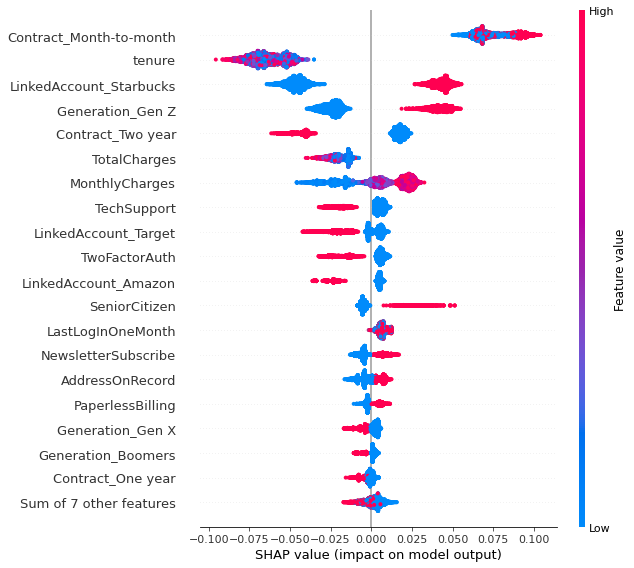

In [22]:
shap.plots.beeswarm(shap_values_multiple[:,:,-1], max_display=20)

**Model insights**: 
- customers under month-to-month contract --> high chance to churn
- customers have linked account with Starbucks --> high chance to churn
- customers who are Gen Z --> high chance to churn
- not provided enough Starbuck rewards

**Business actions**: 
- form strategy to convert month-to-month contract to yearly subscription
- form strategy to work with Starbuck to provide more rewards